<a href="https://colab.research.google.com/github/PerlaLunaD/analisis-salarial-por-industria/blob/main/An%C3%A1lisis__Salarial__por__Industria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. El problema del negocio

Como afecta el grado academico y la especializacion al salario en diferenrtes tipos de trabajo dentro de una industria en especifico.

### 2. Importando librerias necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 3. Carga y exploracion de datos (una primer mirada al dataset)

In [10]:
data = pd.read_csv ('/content/train_features2.csv')

In [11]:
print(data.shape)

(1000000, 10)


In [12]:
data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,Unnamed: 8,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83,NaN,130.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73,NaN,101.0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10.0,38,NaN,137.0
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,NaN,17,NaN,NaN
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8.0,16,NaN,163.0


In [13]:
data.tail()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,Unnamed: 8,salary
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19.0,94,NaN,88.0
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12.0,35,NaN,160.0
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16.0,81,NaN,64.0
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6.0,5,NaN,149.0
999999,JOB1362685407686,COMP59,JUNIOR,BACHELORS,NONE,EDUCATION,20.0,11,NaN,88.0


In [14]:
data.count()

,0
jobId,1000000
companyId,1000000
jobType,1000000
degree,1000000
major,1000000
industry,1000000
yearsExperience,999999
milesFromMetropolis,1000000
Unnamed: 8,0
salary,999999


### 3. Limpieza

In [15]:
cols =['jobId','companyId','jobType','degree','major','industry','yearsExperience','milesFromMetropolis', 'Unnamed: 8', 'salary']

df = data[cols]

In [61]:
df = data[cols]

In [62]:
df

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,Unnamed: 8,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83,NaN,130.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73,NaN,101.0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10.0,38,NaN,137.0
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,NaN,17,NaN,NaN
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8.0,16,NaN,163.0
...,...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19.0,94,NaN,88.0
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12.0,35,NaN,160.0
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16.0,81,NaN,64.0
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6.0,5,NaN,149.0


In [63]:
df.rename(columns={'jobId':'Id'},inplace=True)
df.rename(columns={'companyId':'companyId'},inplace=True)
df.rename(columns={'JobType':'jobType'},inplace=True)
df.rename(columns={'yearsExperience	':'yearsExperience	'},inplace=True)
df.rename(columns={'milesFromMetropolis':'milesFromMetropolis'},inplace=True)
df.rename(columns={'Unnamed: 8':'Unnamed'},inplace=True)
#se modifico el nombre de los emcabezados

In [64]:
df

,Id,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,Unnamed,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83,NaN,130.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73,NaN,101.0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10.0,38,NaN,137.0
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,NaN,17,NaN,NaN
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8.0,16,NaN,163.0
...,...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19.0,94,NaN,88.0
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12.0,35,NaN,160.0
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16.0,81,NaN,64.0
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6.0,5,NaN,149.0


In [65]:
df['yearsExperience'].unique()

array([10.,  3., nan,  8.,  2., 23.,  9.,  1., 17., 24.,  7., 21., 13.,
       11., 14., 18., 20., 12., 15., 22.,  0., 19.,  5.,  4., 16.,  6.])

In [66]:
df.drop_duplicates(inplace=True)  # Elimina filas duplicadas

In [68]:
len(df)

1000000

In [67]:
df1 = df.copy()

In [69]:
df1

,Id,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,Unnamed,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83,NaN,130.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73,NaN,101.0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10.0,38,NaN,137.0
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,NaN,17,NaN,NaN
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8.0,16,NaN,163.0
...,...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19.0,94,NaN,88.0
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12.0,35,NaN,160.0
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16.0,81,NaN,64.0
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6.0,5,NaN,149.0


In [70]:
mediana = df1['yearsExperience'].median()
mediana

12.0

In [71]:
df1['yearsExperience'] = df1['yearsExperience'].fillna(mediana)

In [72]:
df1

,Id,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,Unnamed,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83,NaN,130.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73,NaN,101.0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10.0,38,NaN,137.0
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,12.0,17,NaN,NaN
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8.0,16,NaN,163.0
...,...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19.0,94,NaN,88.0
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12.0,35,NaN,160.0
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16.0,81,NaN,64.0
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6.0,5,NaN,149.0


In [73]:
mediana = df1['salary'].median()
mediana

114.0

In [74]:
df1['salary'] = df1['salary'].fillna(mediana)

In [75]:
df1

,Id,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,Unnamed,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83,NaN,130.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73,NaN,101.0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10.0,38,NaN,137.0
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,12.0,17,NaN,114.0
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8.0,16,NaN,163.0
...,...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19.0,94,NaN,88.0
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12.0,35,NaN,160.0
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16.0,81,NaN,64.0
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6.0,5,NaN,149.0


In [76]:
# Eliminar la columna con el índice 'Unnamed'
df1 = df1.drop('Unnamed', axis=1)

In [77]:
df1

,Id,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83,130.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73,101.0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10.0,38,137.0
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,12.0,17,114.0
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8.0,16,163.0
...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19.0,94,88.0
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12.0,35,160.0
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16.0,81,64.0
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6.0,5,149.0


In [78]:
# Seleccionar la columna de salarios
columna_salarios = 'salary'

# Calcular el IQR
Q1 = df1[columna_salarios].quantile(0.25)
Q3 = df1[columna_salarios].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df1[(df1[columna_salarios] < limite_inferior) | (df1[columna_salarios] > limite_superior)]

# Mostrar los outliers
print(outliers)

                      Id companyId         jobType     degree        major  \
266     JOB1362684407953    COMP30             CEO    MASTERS      BIOLOGY   
362     JOB1362684408049    COMP38             CTO    MASTERS         NONE   
560     JOB1362684408247    COMP53             CEO    MASTERS      BIOLOGY   
670     JOB1362684408357    COMP26             CEO    MASTERS         MATH   
719     JOB1362684408406    COMP54  VICE_PRESIDENT   DOCTORAL      BIOLOGY   
...                  ...       ...             ...        ...          ...   
998516  JOB1362685406203    COMP29             CFO    MASTERS  ENGINEERING   
999249  JOB1362685406936    COMP30             CEO       NONE         NONE   
999280  JOB1362685406967     COMP2             CFO  BACHELORS     BUSINESS   
999670  JOB1362685407357    COMP20             CEO   DOCTORAL   LITERATURE   
999893  JOB1362685407580     COMP9             CEO   DOCTORAL  ENGINEERING   

       industry  yearsExperience  milesFromMetropolis  salary  

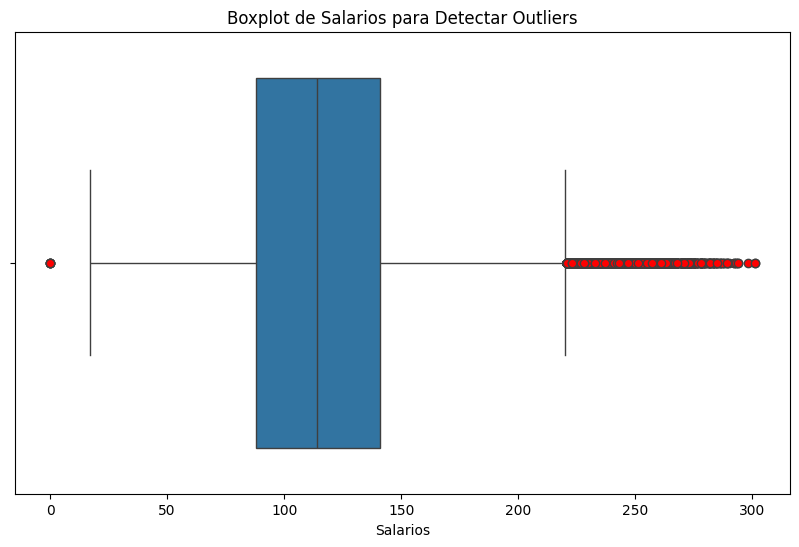

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1[columna_salarios], flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6})
plt.title('Boxplot de Salarios para Detectar Outliers')
plt.xlabel('Salarios')
plt.show()

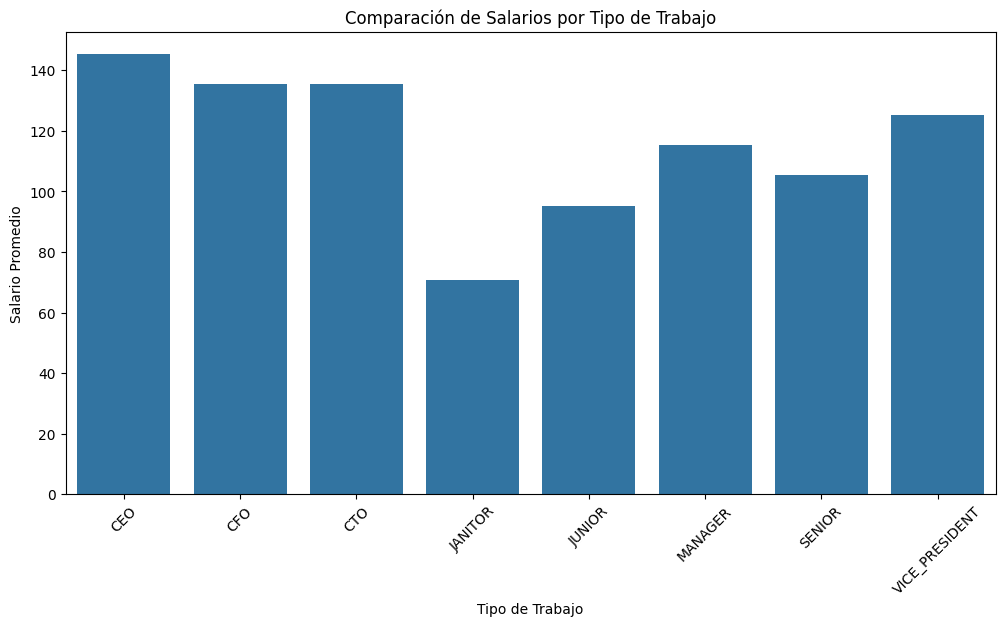

In [53]:

# Calcular el promedio del salario agrupado por tipo de trabajo
salary_avg = df1.groupby('jobType')['salary'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='jobType', y='salary', data=salary_avg)

# Agregar título y etiquetas
plt.title('Comparación de Salarios por Tipo de Trabajo')
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Salario Promedio')

# Rotar las etiquetas del eje X si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()



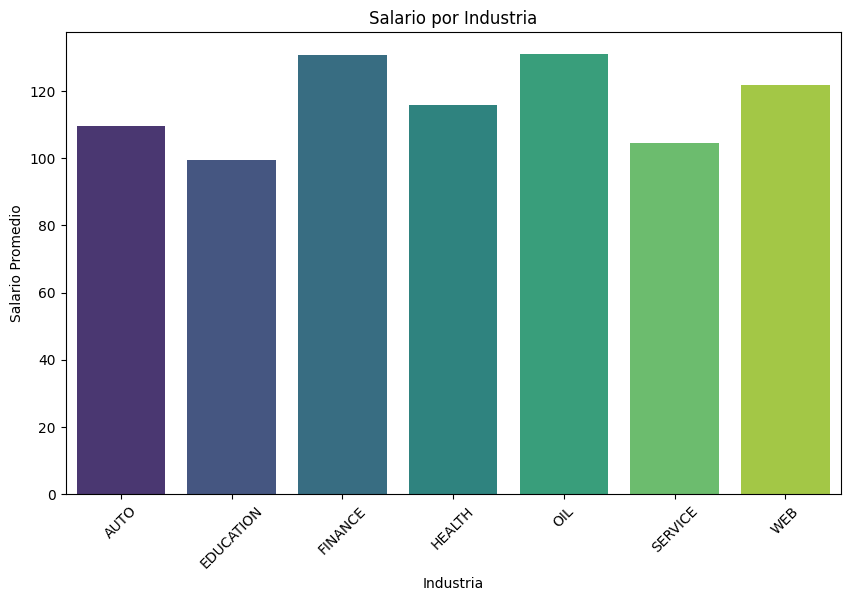

In [54]:

# Calcula la media del salario agrupado por industria
salary_by_industry = df.groupby('industry')['salary'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='industry', y='salary', data=salary_by_industry, palette='viridis', hue='industry', dodge=False)
plt.title('Salario por Industria')
plt.xlabel('Industria')
plt.ylabel('Salario Promedio')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # Remueve la leyenda
plt.show()

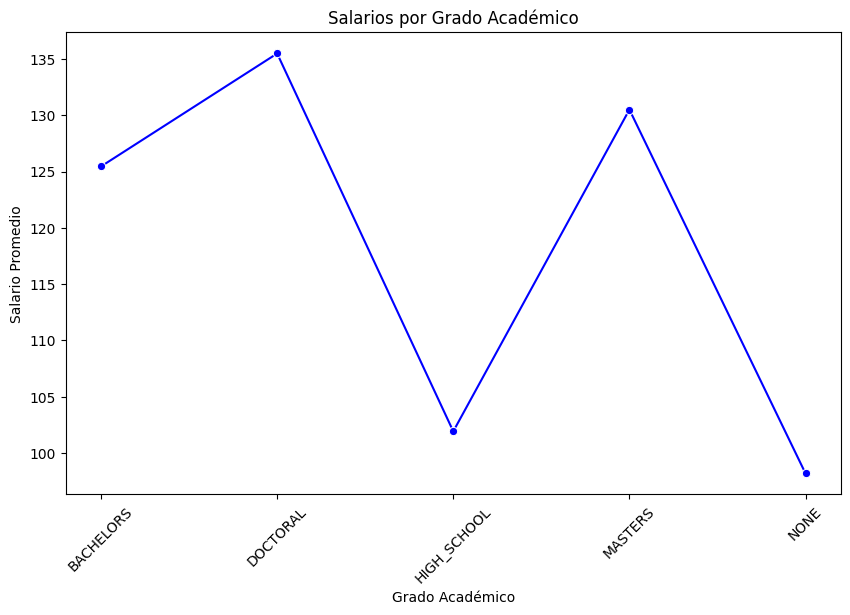

In [55]:
# Calcular el salario promedio por grado académico
salary_by_degree = df1.groupby('degree')['salary'].mean().reset_index()

# Ordenar los grados académicos (opcional, dependiendo de tus datos)
salary_by_degree = salary_by_degree.sort_values(by='degree')

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(x='degree', y='salary', data=salary_by_degree, marker='o', color='b')

# Agregar título y etiquetas
plt.title('Salarios por Grado Académico')
plt.xlabel('Grado Académico')
plt.ylabel('Salario Promedio')

# Rotar las etiquetas del eje X para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

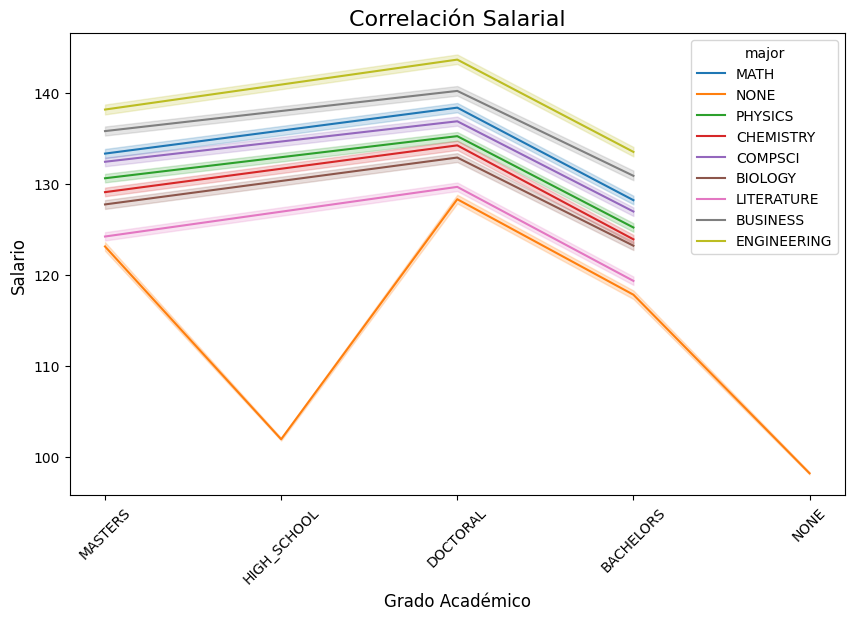

In [56]:

# Crear un gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(x='degree', y='salary', hue='major', data=df1, markers='o', dashes=False)

# Título y etiquetas
plt.title('Correlación Salarial', fontsize=16)
plt.xlabel('Grado Académico', fontsize=12)
plt.ylabel('Salario', fontsize=12)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


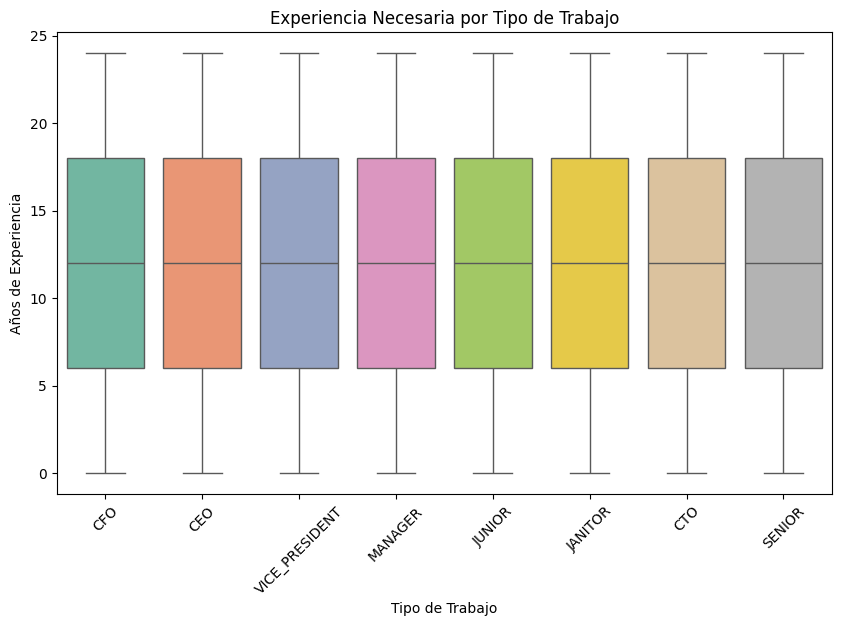

In [57]:
# Gráfico de caja y bigotes (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='jobType', y='yearsExperience', data=df1, palette='Set2', hue='jobType', dodge=False)
plt.title('Experiencia Necesaria por Tipo de Trabajo')
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Años de Experiencia')
plt.legend([],[], frameon=False)  # Remueve la leyenda si es redundante
plt.xticks(rotation=45)
plt.show()

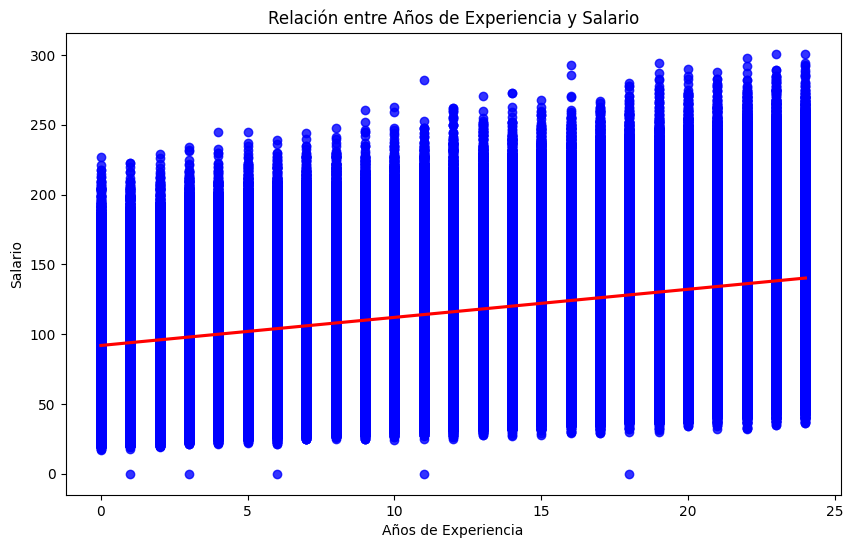

In [58]:
# Crear el gráfico de dispersión con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(x='yearsExperience', y='salary', data=df1, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ci=None)

# Agregar título y etiquetas
plt.title('Relación entre Años de Experiencia y Salario')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')

# Mostrar el gráfico
plt.show()


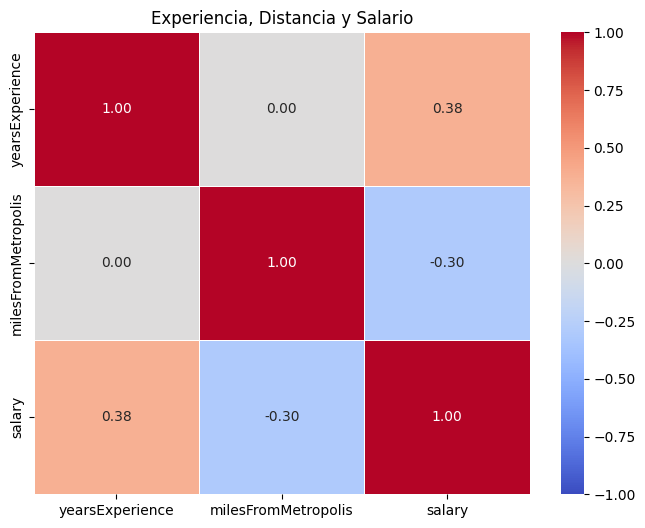

In [79]:
# Seleccionar solo las columnas numéricas relevantes
numeric_data = df1[['yearsExperience', 'milesFromMetropolis', 'salary']]

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Agregar título
plt.title('Experiencia, Distancia y Salario')

# Mostrar el gráfico
plt.show()


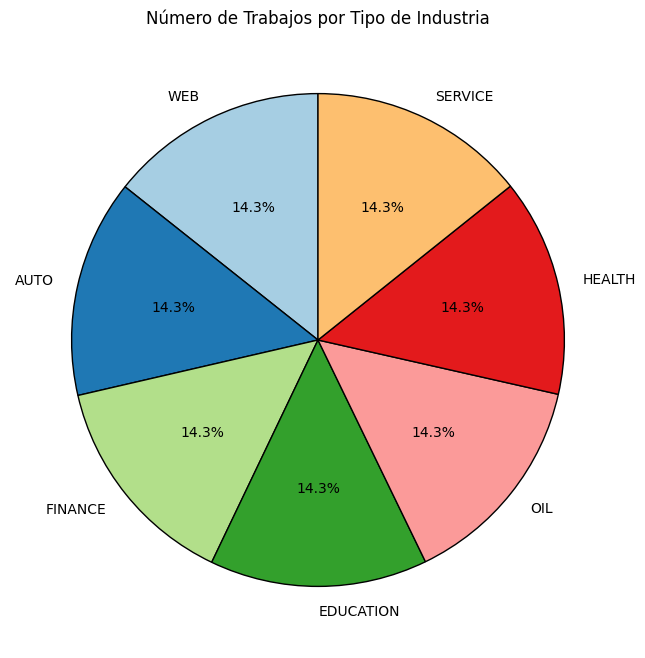

In [80]:
# Calcular el número de trabajos por industria
job_counts_by_industry = df1['industry'].value_counts()

# Crear el gráfico de sectores con conteo actualizado
plt.figure(figsize=(8, 8))
plt.pie(job_counts_by_industry, labels=job_counts_by_industry.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors[:len(job_counts_by_industry)], wedgeprops={'edgecolor': 'black'})

# Agregar título
plt.title('Número de Trabajos por Tipo de Industria')

# Mostrar el gráfico
plt.show()